In [1]:
from parcels import FieldSet
from glob import glob
import xarray as xr

INFO: Compiled ParcelsRandom ==> /tmp/parcels-729666/libparcels_random_17645018-2cb5-4cf3-a407-0ecf80a20e43.so


In [2]:
#local
#path = "/home/tknoop/gits/parcels_test/data/fullcop_data/MetO-NWS-PHY-hi-CUR/2019/01/*.nc"
#nesh
path =  "/gxfs_work1/geomar/smomw529/2022_north-sea_oysters/data/ocean/MetO-NWS-PHY-hi-CUR/2019/01/*.nc"

#open via xarray
#ds = xr.open_mfdataset(path)
#ds

In [3]:
#select only down to 100m water depth
#ds.isel(depth=slice(0, 13))

In [4]:
variables = {'U': 'uo',
             'V': 'vo'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time',
              'depth' : 'depth'
              }
#only load data down to 100m
indices =  {'depth' : range(0,13)}

#generate fieldset from xarray
#fieldset = FieldSet.from_xarray_dataset(ds.isel(depth=slice(0, 13)),variables,dimensions)
#del ds
#fieldset.get_fields()

In [5]:
#fieldset.V.show(depth_level=3)

In [6]:
#generate fieldset directly from files via parcels 
import os

file_list = glob(path) #get list of filenames in specified month_directory
#sort by the last 8 digits (start date)
#file_list = sorted(file_list, key=lambda i: int(os.path.splitext(os.path.basename(i))[0][-8:]))
file_list = sorted(file_list)


testfield = FieldSet.from_netcdf(file_list, variables, dimensions, indices = indices)

/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


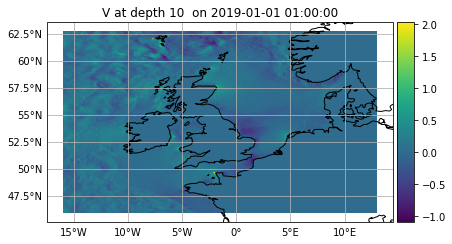

In [7]:
testfield.V.show(depth_level=3)

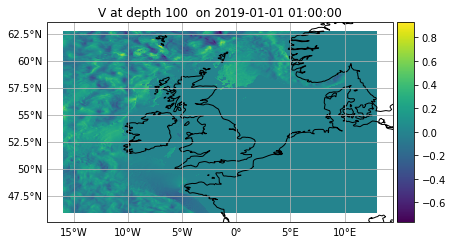

In [8]:
testfield.V.show(depth_level=12)